# <font color = 'blue'>Heart disease prediction</font>

## Enoch A. Akinpelu (PhD, CEng, MIChemE)

## Importing important libraries for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data collection

In [2]:
# Read the csv dataset using pandas
df = pd.read_csv('heart_disease_data.csv')

## Examining the first 5 rows of the data

In [3]:
# Peruse The first 5 Rows of our heart Disease Data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Check the data types

In [4]:
# Get the data type for each column
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### <font color = 'red'>There are 13 integer data types and 1 float data type in the dataset</font>

## Statistical description of the data

In [5]:
# Get the summary statistics for the dataset
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Count the number of missing values

In [6]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### <font color = 'red'>There are no missing value in the dataset</font>

## Check the shape of the dataset

In [7]:
df.shape

(303, 14)

## Count the number of duplicate rows

In [8]:
# Check for duplicate rows
print('Number of duplicate rows before dropping:', df.duplicated().sum())

Number of duplicate rows before dropping: 1


In [9]:
# Drop duplicate rows
df = df.drop_duplicates()

In [10]:
# Check for duplicate rows again
print('Number of duplicate rows after dropping:', df.duplicated().sum())

Number of duplicate rows after dropping: 0


## Confirm the duplicate row has been dropped

In [11]:
df.shape

(302, 14)

## Univariate Analysis

## Proportion for all categorical columns

In [12]:
# Put all categorical columns in a list manually
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

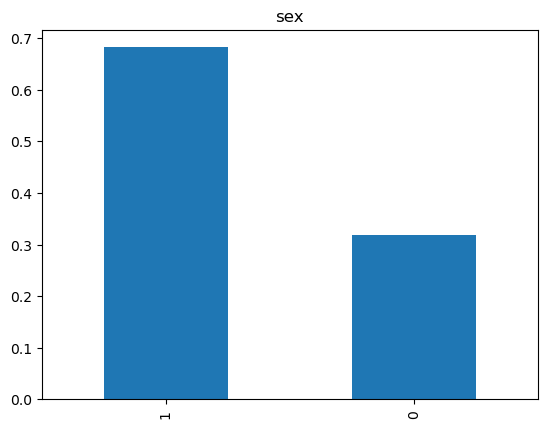

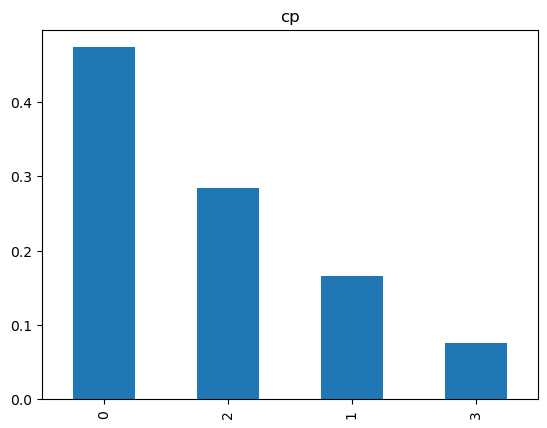

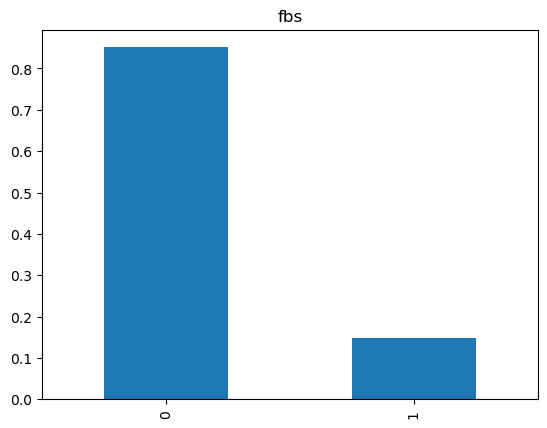

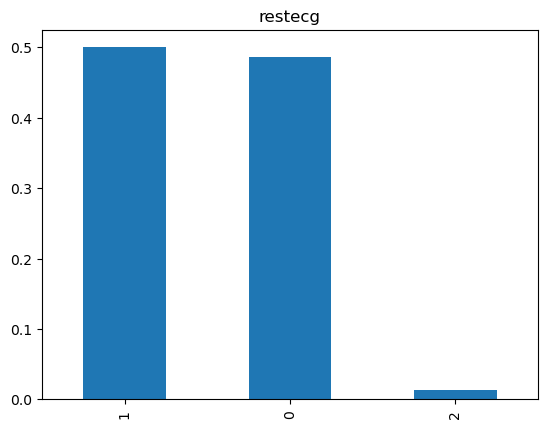

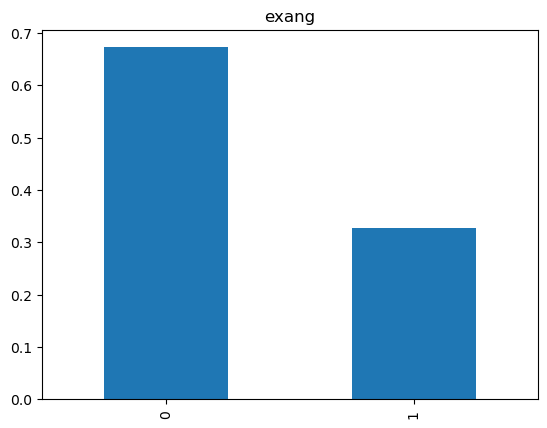

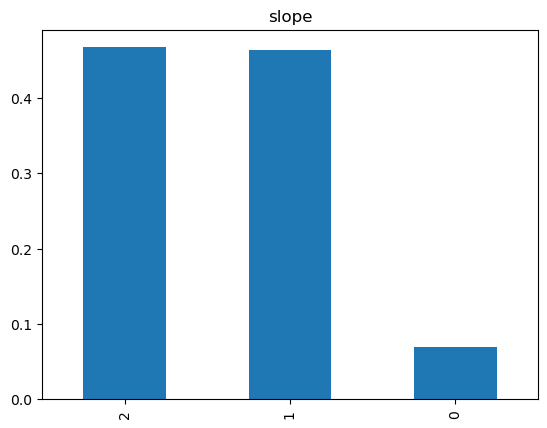

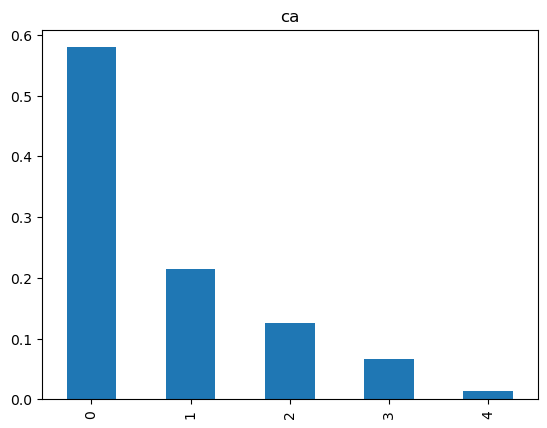

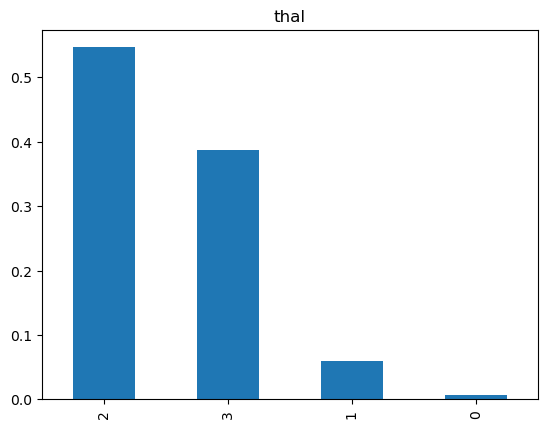

In [13]:
# Plot the proportions of different values for every categorical value in the list cat_cols
for col in cat_cols:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(col)
    plt.show()

## Distributions of all numerical columns

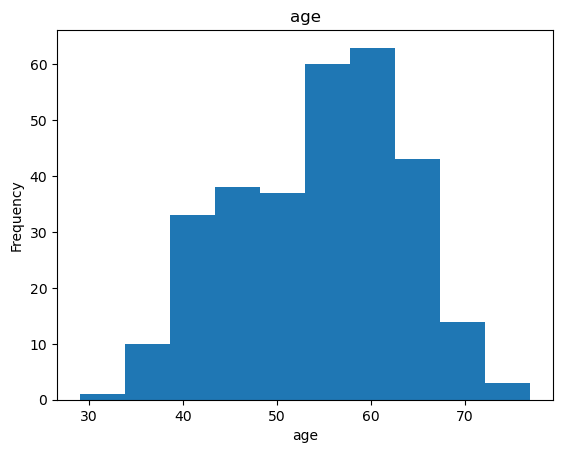

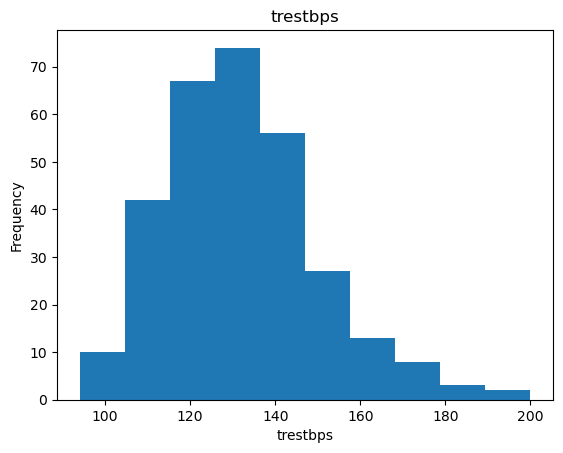

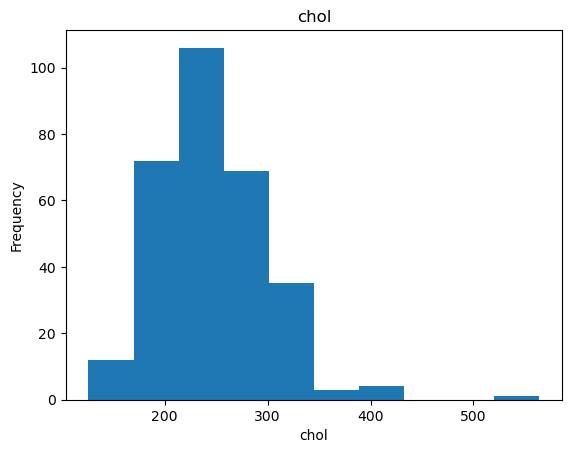

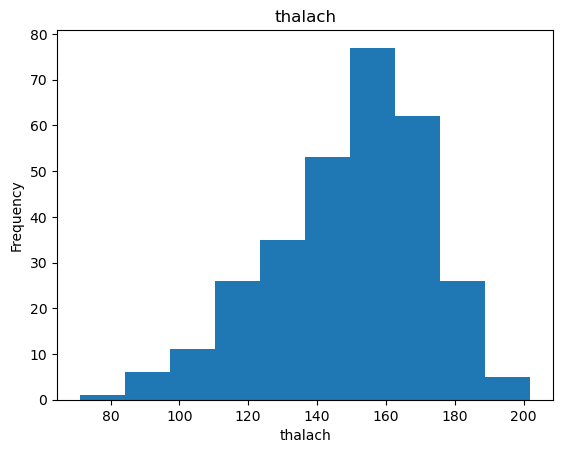

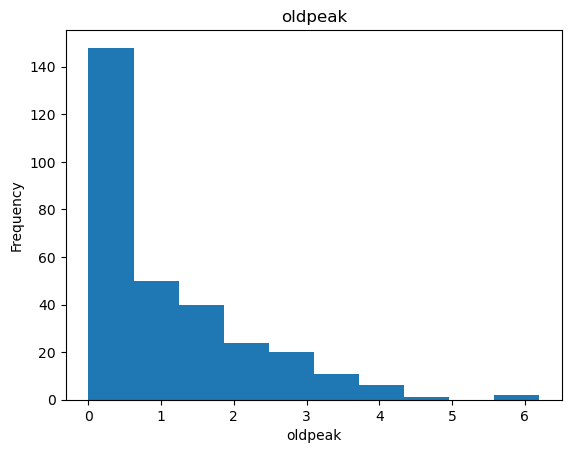

In [14]:
# Put all numerical columns in a list manually
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot the distributions of different values for every numerical value in the list above
for col in num_cols:
    plt.hist(df[col], bins=10)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

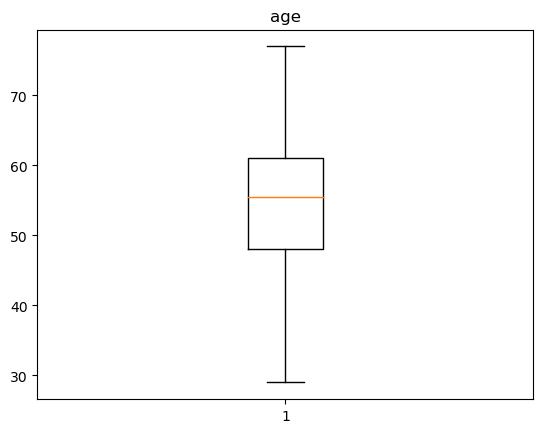

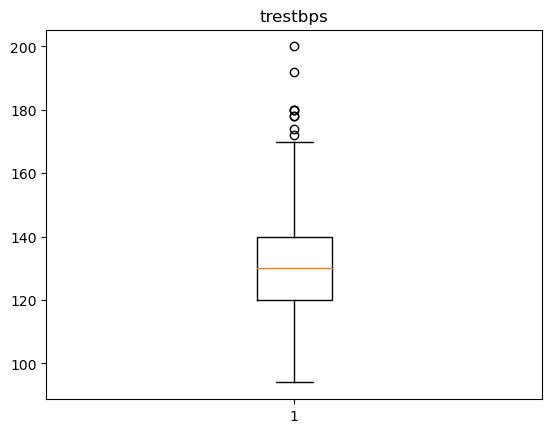

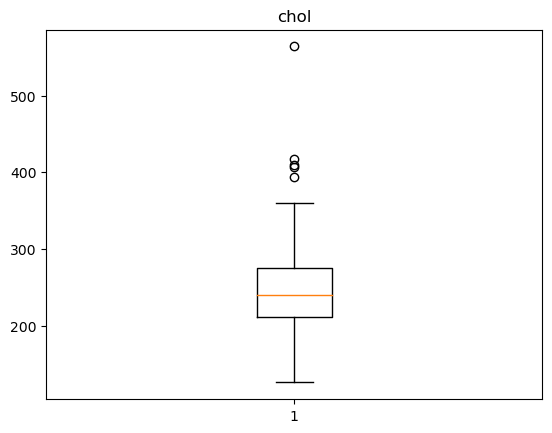

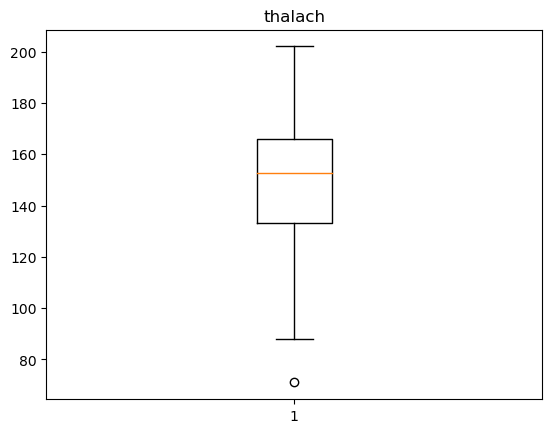

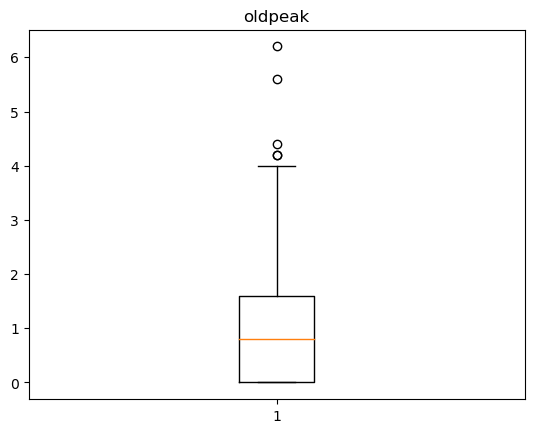

In [15]:
# Plot the boxplots of different values for every numerical value in the list above
for col in num_cols:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

# Bivariate Analysis

In [16]:
import seaborn as sns

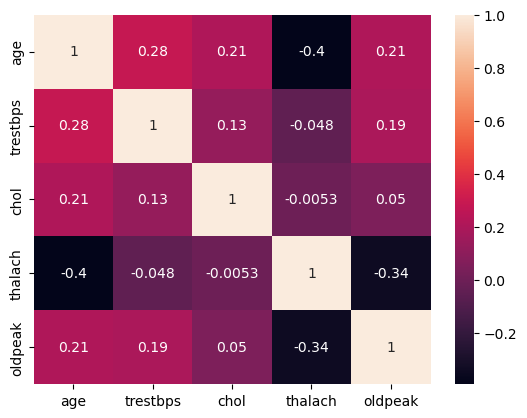

In [17]:
# Put all numerical columns in a list manually
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot a heatmap with all numerical values in the list
sns.heatmap(df[num_cols].corr(), annot=True);

## Proportion of categorical columns with regard to the target column

<Figure size 800x600 with 0 Axes>

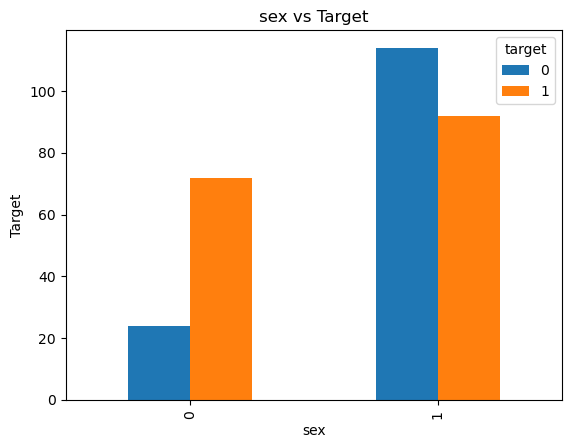

<Figure size 800x600 with 0 Axes>

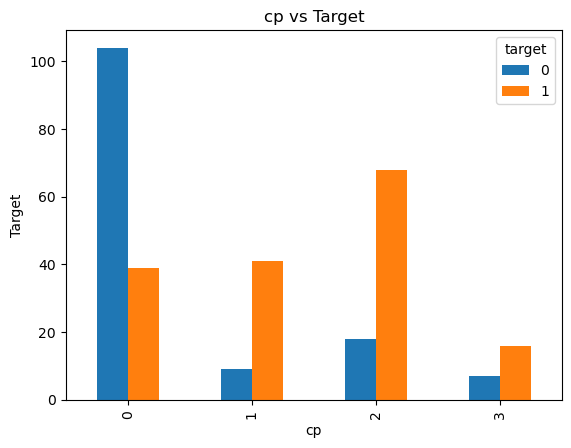

<Figure size 800x600 with 0 Axes>

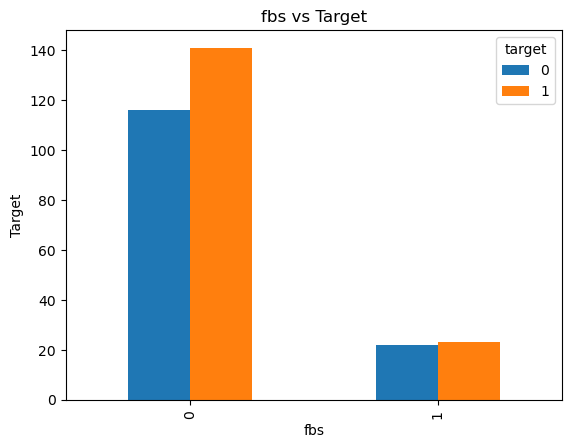

<Figure size 800x600 with 0 Axes>

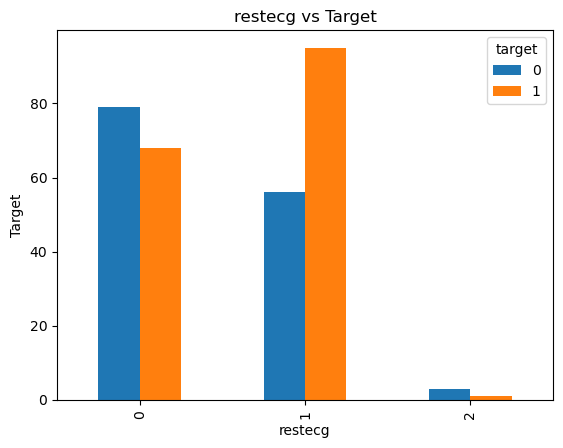

<Figure size 800x600 with 0 Axes>

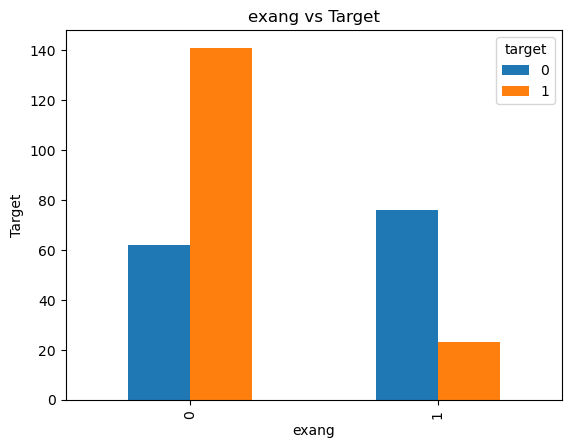

<Figure size 800x600 with 0 Axes>

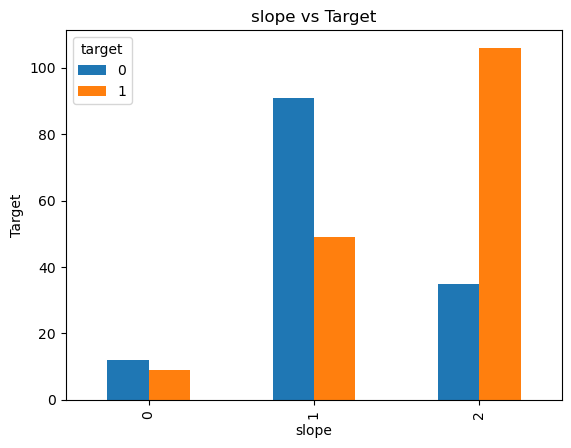

<Figure size 800x600 with 0 Axes>

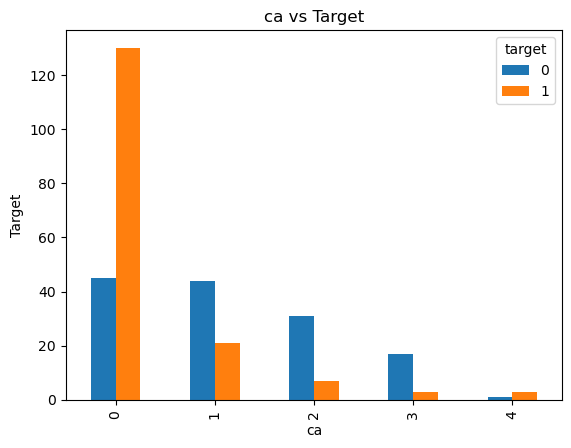

<Figure size 800x600 with 0 Axes>

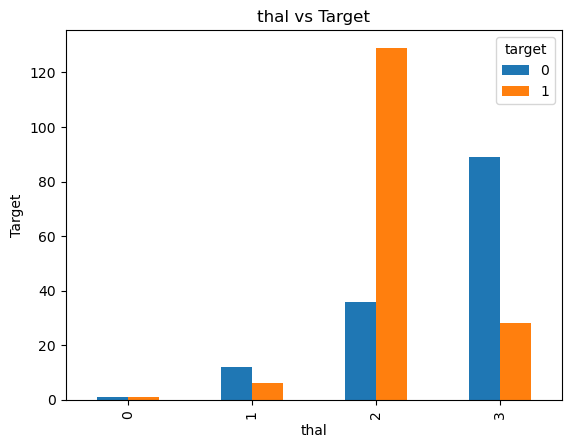

In [18]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Plot the proportions of categorical columns in the list above per each value in the target column
for col in cat_cols:
    if col != 'target':
        plt.figure(figsize=(8,6))
        pd.crosstab(df[col], df['target']).plot(kind='bar', stacked=False)
        plt.title(col + ' vs Target')
        plt.xlabel(col)
        plt.ylabel('Target')
        plt.show()

## Distribution of numerical columns with regard to the target column

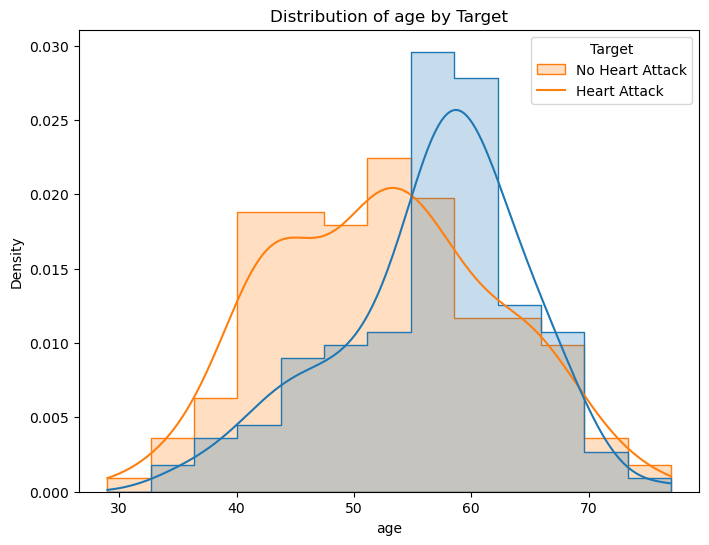

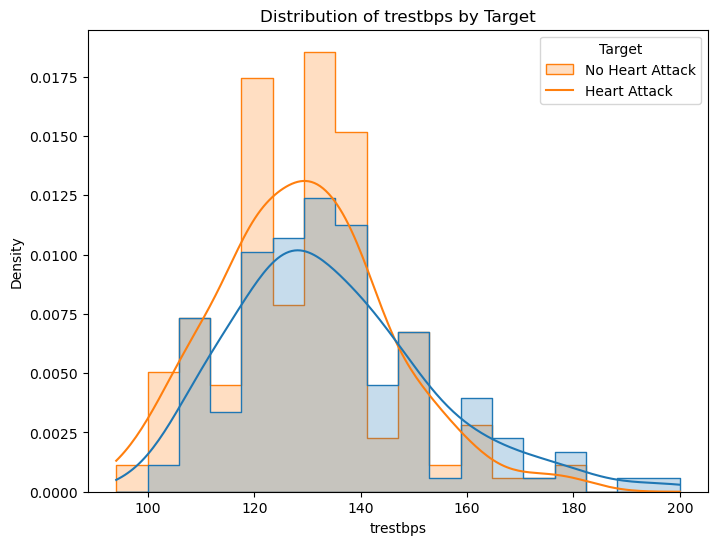

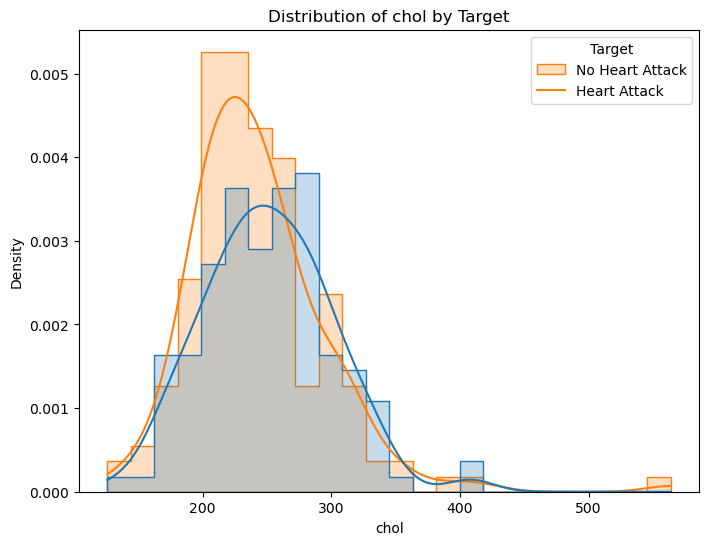

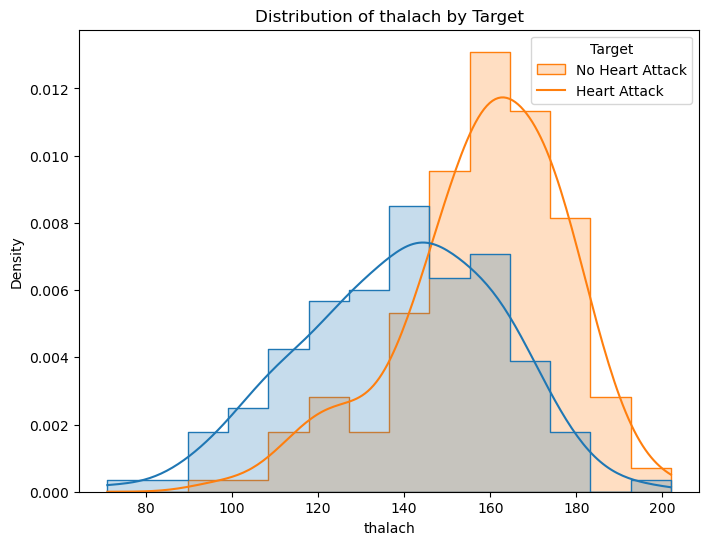

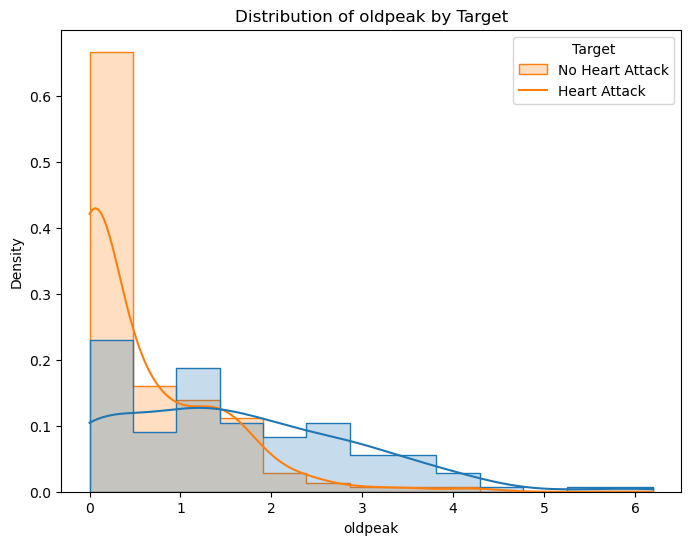

In [19]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Plot the distribution of numerical columns in the list above per each value in the target column
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue='target', element='step', kde=True, stat='density')
    plt.title(f"Distribution of {col} by Target")
    plt.legend(title='Target', labels=['No Heart Attack', 'Heart Attack'])
    plt.show()

## Box plot of numerical columns with regards to the target column

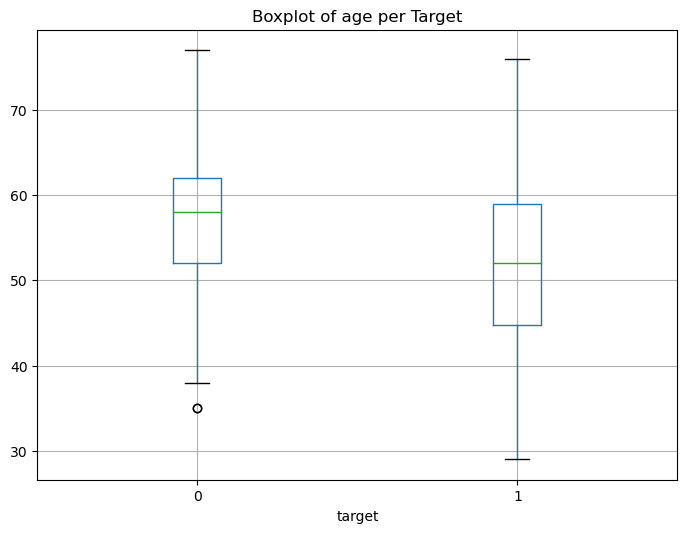

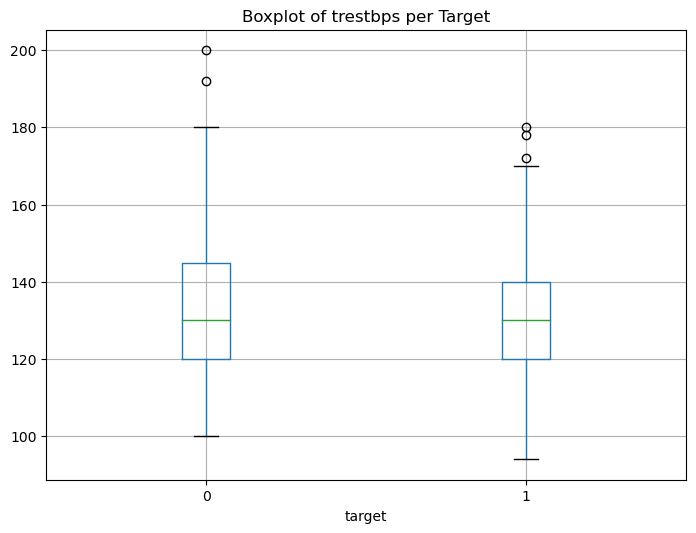

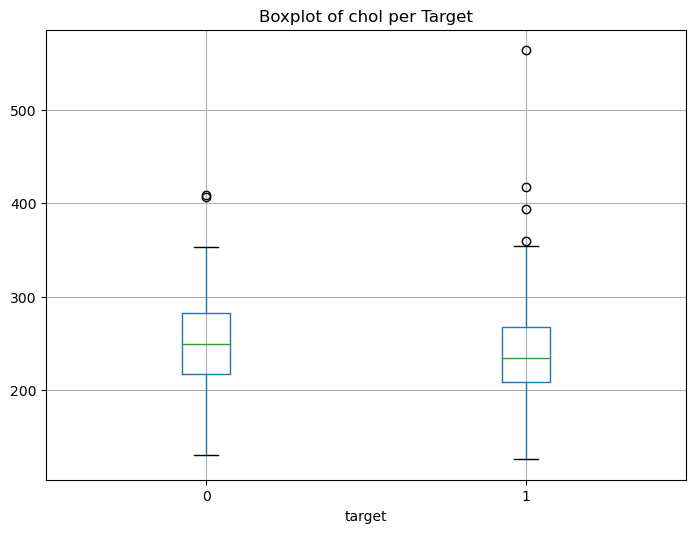

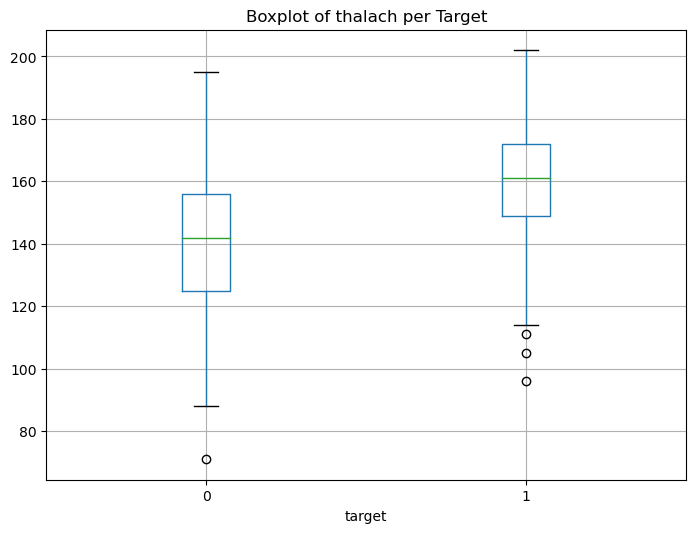

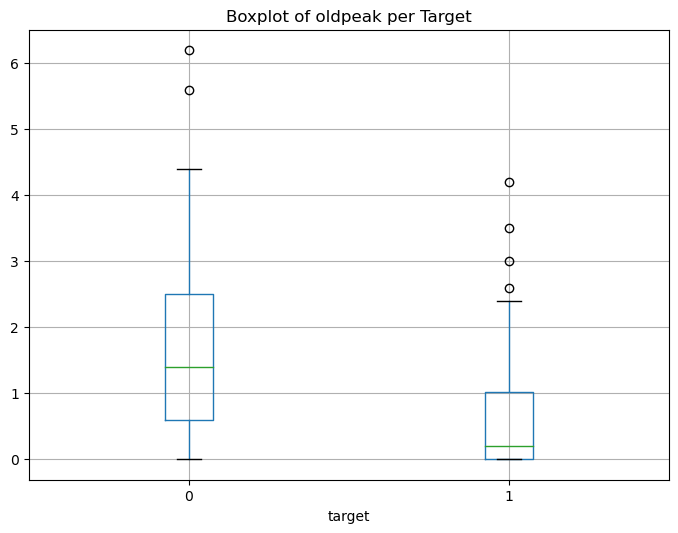

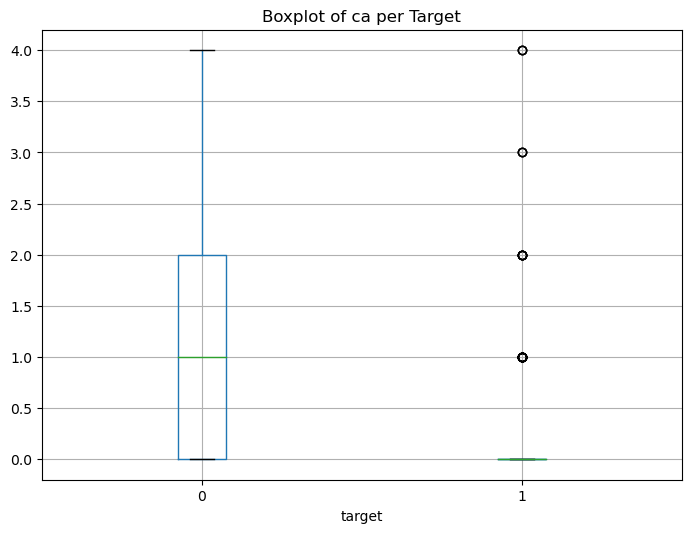

In [20]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

# Group the dataset by the target column and plot the boxplots of the numerical columns for each group
for col in num_cols:
    df.boxplot(column=[col], by='target', figsize=(8, 6))
    plt.title('Boxplot of {} per Target'.format(col))
    plt.suptitle('')
    plt.show()

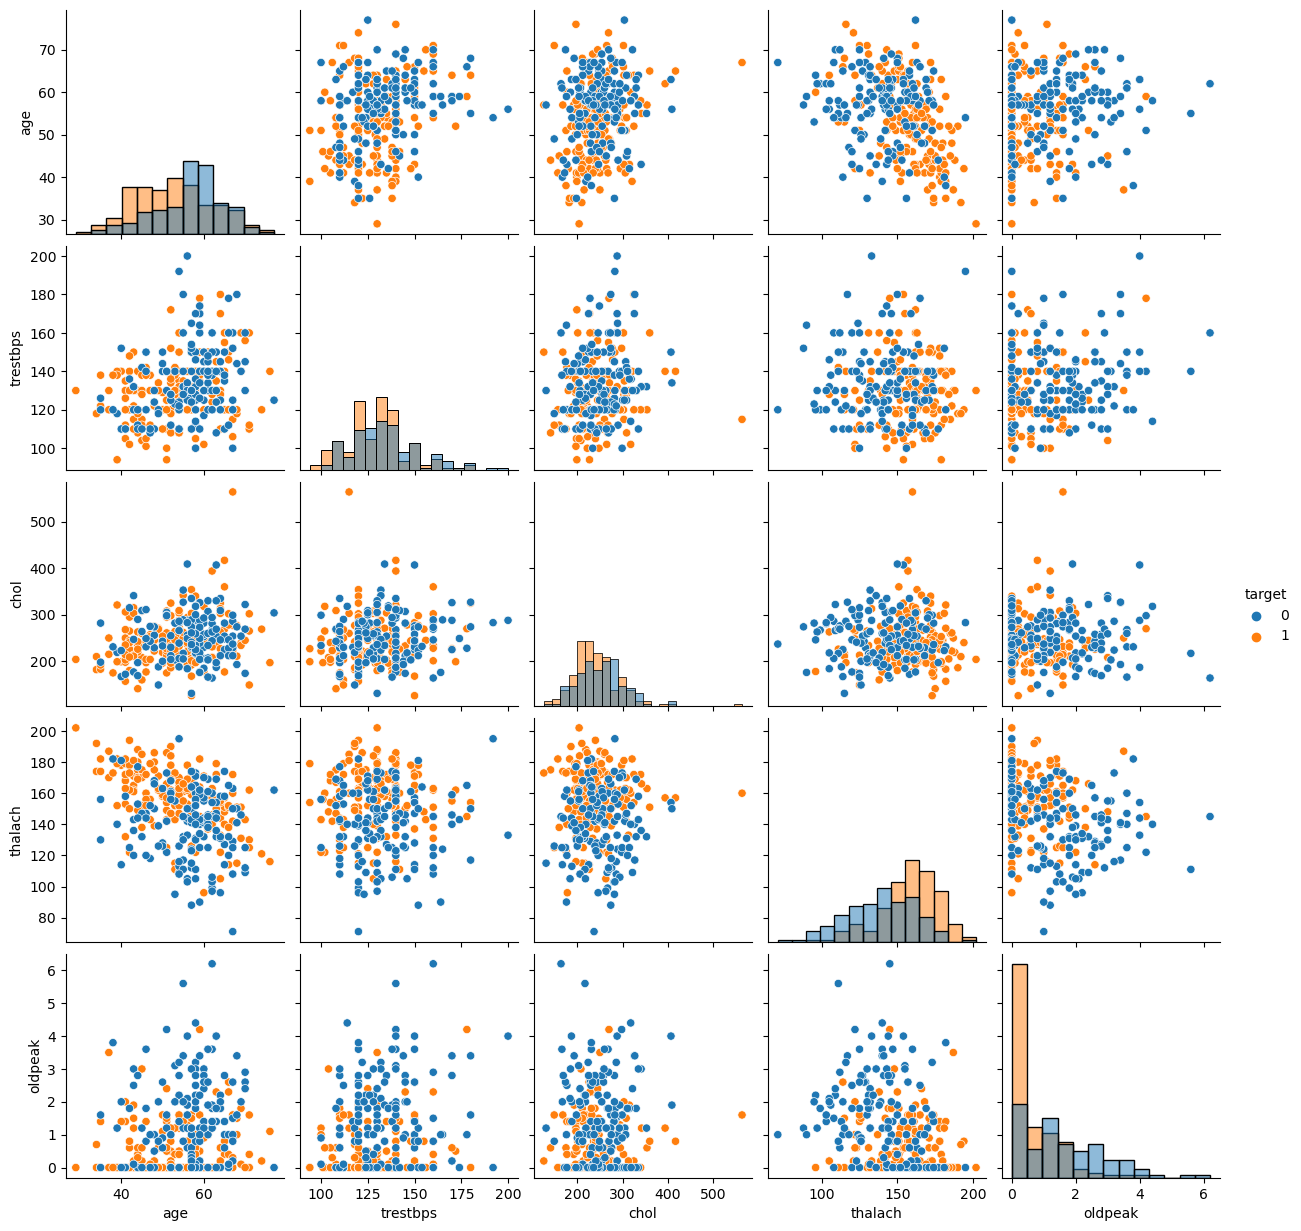

In [21]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create pair plot with all numerical columns using seaborn and target column as hue
sns.pairplot(df, vars=numerical_cols, hue='target', diag_kind='hist');

# Train a heart attack prediction model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
# Define X and y
X = df.drop('target', axis=1)
y = df['target']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train a random forest classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Evaluate the model
y_pred = rfc.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [27]:
# Confusion matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[26  3]
 [ 5 27]]


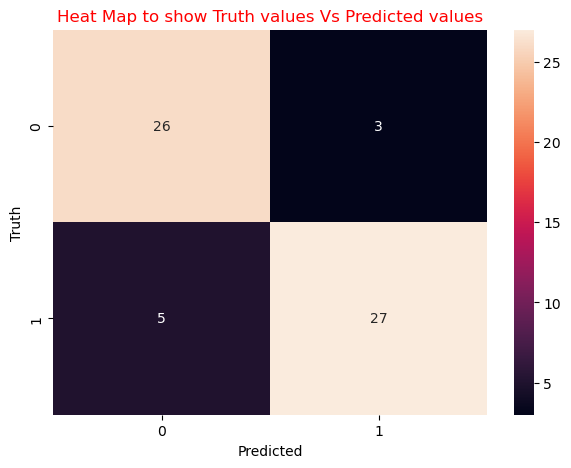

In [28]:
# Visualizing the confusion matrix using heat map
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.title("Heat Map to show Truth values Vs Predicted values", color ="r")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



# Inference

- <font color = 'red'>There are 13 integer data types and 1 float data type in the dataset.</font>
- <font color = 'red'>There were no missing value in the dataset.</font>
- <font color = 'red'>However, there was a row duplicate in the dataset.</font>
- <font color = 'red'>The EDA indicates there are more patient with no fasting blood sugar (fbs).</font>
- <font color = 'red'>The distribution of age and thalach are left skewed while trestbps,chol and oldpeak are right skewed.</font>
- <font color = 'red'>There are no relationship among the numerical columns.</font>
- <font color = 'red'>The Random Forest Classifier model prediction of heart attack was 87% accurate.</font>